In [74]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


data_dir="Dataset"

#splitting the data for testing and training
#Training
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#classes
class_names=train_ds.class_names
#print(class_names)

#training the model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

input_shape=(None,180,180,3)
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.build(input_shape)
resnet_model.summary()

resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#training the dataset
epochs=10
history=resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

#at the end there is over fitting

#making predictions



Found 457 files belonging to 5 classes.
Using 366 files for training.
Found 457 files belonging to 5 classes.
Using 91 files for validation.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 64s 5s/step - loss: 2.7761 - accuracy: 0.3852 - val_loss: 1.5992 - val_accuracy: 0.4176
Epoch 2/10
12/12 [==============================] - 57s 5s/step - loss: 0.9852 - accuracy: 0.5710 - val_loss: 0.9922 - val_accuracy: 0.5275
Epoch 3/10
12/12 [==============================] - 59s 5s/step - loss: 0.6395 - accuracy: 0.7268 - val_loss: 0.8437 - val_accuracy: 0.6593
Epoch 4/10
12/12 [==============================] - 59s 5s/step - loss: 0.3975 - accuracy: 0.8388 - val_loss: 0.7824 - val_accuracy: 0.6703
Epoch 5/10
12/12 [==============================] - 58s 5s/step - loss: 0.2578 - accuracy: 0.9290 - val_loss: 0.8680 - val_accuracy: 0.7033
Epoch 6/10
12/12 [==============================] - 57s 5s/step - loss: 0.1984 - accuracy: 0.9454 - val_loss: 0.9706 - val_accuracy: 0.6703
Epoch 7/10
12/12 [==============================] - 57s 5s/step - loss: 0.1690 - accuracy: 0.9590 - val_loss: 1.0082 - val_accuracy: 0.6813
Epoch 8/10
12/12 [=============

In [75]:
import urllib.request
from cryptography.fernet import Fernet
import base64
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
msg=str(history.history['accuracy'])

password_provided = input("Provide a key : ")
password = password_provided.encode()

salt = b'salt_'
kdf = PBKDF2HMAC(
algorithm=hashes.SHA256(),
length=32,
salt=salt,
iterations=100000,
backend=default_backend()
)
key = base64.urlsafe_b64encode(kdf.derive(password))
key = Fernet.generate_key()
fernet = Fernet(key)
urllib.request.urlopen
msg=msg.encode()
f = Fernet(key)
msg=f.encrypt(msg)
msg=str(msg)
print("\nYour encrypted text is: "+msg)
b=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=D39DI4XQAKQ49C8N&field1='+msg)

print("\nYour message has successfully been sent with end-to-end encryption!\nThe receiver needs to enter the same key.")


Provide a key : Key1

Your encrypted text is: b'gAAAAABjLsx7Xo6UBXMPSc03nWsvDEv0IK9O8VCf42YJ58_2reIYIePvknza6T6x3Np1OavMkfT-FRwo0gnj235Oz8KOrcSfUuTTkzV_0VclPld_GTg0UVDs50YZr7Lil2kYJg4LryDR1vM1KhZSDMnTB7Fxw9Kb05ELckT-CfBVaBWHzkVMPGswRYmQ35Qa-IJruDvD_9vEVRn-BIZ4TAOt1ifrOfkGgr8IBbs8S1p2nmohxBHvkntbq7mAiq3jm34RaFL_tuFTLrqmjPLoy8JL_NtMjjzy8fOzCMjmhL9MXvxaVBEaiIh_W9G7Gc7N7er2wc5OnmLlec8AXK3fXCx7WC6LZrYPCw=='

Your message has successfully been sent with end-to-end encryption!
The receiver needs to enter the same key.


In [76]:
import urllib.request


import requests
msg=requests.get("https://thingspeak.com/channels/1579755/field/1")
msg=msg.json()['feeds'][-1]['field1']
print("\nThe Message sent was: \n\n"+str(msg))


The Message sent was: 

b'gAAAAABjLsx7Xo6UBXMPSc03nWsvDEv0IK9O8VCf42YJ58_2reIYIePvknza6T6x3Np1OavMkfT-FRwo0gnj235Oz8KOrcSfUuTTkzV_0VclPld_GTg0UVDs50YZr7Lil2kYJg4LryDR1vM1KhZSDMnTB7Fxw9Kb05ELckT-CfBVaBWHzkVMPGswRYmQ35Qa-IJruDvD_9vEVRn-BIZ4TAOt1ifrOfkGgr8IBbs8S1p2nmohxBHvkntbq7mAi


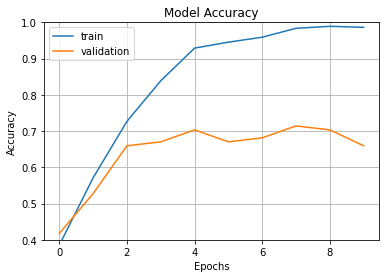

In [77]:


#evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [78]:
msg=str(history.history['val_accuracy'])

password_provided = input("Provide a key : ")
password = password_provided.encode()
salt = b'salt_'
kdf = PBKDF2HMAC(
algorithm=hashes.SHA256(),
length=32,
salt=salt,
iterations=100000,
backend=default_backend()
)
key = base64.urlsafe_b64encode(kdf.derive(password))
key = Fernet.generate_key()
fernet = Fernet(key)
urllib.request.urlopen
msg=msg.encode()
f = Fernet(key)
msg=f.encrypt(msg)
msg=str(msg)
print("\nYour encrypted text is: "+msg)
b=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=D39DI4XQAKQ49C8N&field2='+msg)

print("\nYour message has successfully been sent with end-to-end encryption!\nThe receiver needs to enter the same key.")

Provide a key : Key2

Your encrypted text is: b'gAAAAABjLsyRlcxIWAdnv9mJwtQTfQLXNnwYgxuFTW_oIAjSRcvfWk5oYRGJl9N9hcmrsf5Kg1ytmrHBc1CaZ09ovqJVGNFr97H5Fa22hCYCFb5eOTEnJ7e0CkBUVeZvq-dF_QaXys-P1TnksVmVenIv4K-ZUGt8ndrz3AXRoGThDvi_e6jfvcMAMC3DtMPHBg4RKd-828b48WUKYu1Uh6_Rnc3IYEqLLDv441o852haADdlrrozgksGOmtlU-VYZHtz4uy95ozpwt63SPXuwqR8yUykG_jV630eI9ndra2lGEnGNyppvnIvVj7z-j7_3KIYxglVWePfnnn8zgmwgGraxK90RoclqA=='

Your message has successfully been sent with end-to-end encryption!
The receiver needs to enter the same key.


In [79]:
import requests
msg=requests.get("https://thingspeak.com/channels/1579755/field/2")
msg=msg.json()['feeds'][-1]['field2']
print("\nThe Message sent was: \n\n"+str(msg))


The Message sent was: 

b'gAAAAABjLsyRlcxIWAdnv9mJwtQTfQLXNnwYgxuFTW_oIAjSRcvfWk5oYRGJl9N9hcmrsf5Kg1ytmrHBc1CaZ09ovqJVGNFr97H5Fa22hCYCFb5eOTEnJ7e0CkBUVeZvq-dF_QaXys-P1TnksVmVenIv4K-ZUGt8ndrz3AXRoGThDvi_e6jfvcMAMC3DtMPHBg4RKd-828b48WUKYu1Uh6_Rnc3IYEqLLDv441o852haADdlrrozgksGOmtlU


In [80]:
score=resnet_model.evaluate(train_ds,verbose=0)

In [81]:
print("test loss: ",score[0])
print("test accuracy: ",score[1])

test loss:  0.06483111530542374
test accuracy:  0.9890710115432739


In [86]:
image=cv2.imread("/content/Dataset/car/car1.jpg")
print(image)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]


[[[223 203 178]
  [223 203 178]
  [223 203 178]
  ...
  [224 204 179]
  [224 204 179]
  [224 204 179]]

 [[223 203 178]
  [223 203 178]
  [223 203 178]
  ...
  [224 204 179]
  [224 204 179]
  [224 204 179]]

 [[223 203 178]
  [223 203 178]
  [223 203 178]
  ...
  [224 204 179]
  [224 204 179]
  [224 204 179]]

 ...

 [[108 108 114]
  [106 109 114]
  [108 108 114]
  ...
  [102 102 108]
  [103 103 109]
  [103 103 109]]

 [[110 113 118]
  [109 113 118]
  [110 113 118]
  ...
  [111 111 117]
  [111 111 117]
  [111 111 117]]

 [[105 109 114]
  [105 109 114]
  [105 109 114]
  ...
  [116 116 122]
  [114 114 120]
  [111 111 117]]]


In [87]:
print("The predicted class is", output_class)

The predicted class is car


In [88]:
msg=str(output_class)
msg = msg.replace(' ', "%20")
msg = msg.replace('\n', "%0A")
b=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=D39DI4XQAKQ49C8N&field3='+msg)
print("\nYour message has successfully been sent!")


Your message has successfully been sent!


In [89]:
msg=requests.get("https://thingspeak.com/channels/1579755/field/3")
msg=msg.json()['feeds'][-1]['field3']
print("\nThe Message sent was: \n\n"+str(msg))


The Message sent was: 

car
